# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px

In [41]:
import pandas as pd
import ipywidgets as widgets

In [42]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [43]:
from sklearn.datasets import make_moons

In [44]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,1.486098,-0.238114,B
1,-0.405621,0.857151,A
2,0.610397,0.690308,A
3,-0.171678,0.876950,A
4,1.072697,-0.642090,B


In [45]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [46]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.285019,0.958522,A
1,0.635192,0.486344,B
2,0.130110,-0.789349,B
3,0.750987,0.275714,B
4,0.448383,0.893841,A


In [47]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

# Answer - Building an experiment

### 1. Creating MOONs and CIRCLEs Datasets

In [48]:
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
DS_NAME = ['Moon', 'Circle']
dfWithMoonAndCircle = pd.DataFrame()  

In [49]:
def getDataFrameByName(dataset_name,noise_level):
    return  make_moons_dataframe(n_samples = 10000, noise_level = noise_level)  if dataset_name == 'Moon' else make_circles_dataframe(n_samples = 10000, noise_level = noise_level)

In [50]:
for dataset_name in DS_NAME:
    for noise_level in noise_levels:
        temp_df = getDataFrameByName(dataset_name,noise_level)
        temp_df['noise_level'] = noise_level
        temp_df['DS_NAME'] = dataset_name
        dfWithMoonAndCircle = pd.concat([dfWithMoonAndCircle, temp_df])
dfWithMoonAndCircle

,x,y,label,noise_level,DS_NAME
0,0.227575,-0.135107,B,0.0,Moon
1,1.960802,0.222766,B,0.0,Moon
2,0.094676,0.075279,B,0.0,Moon
3,0.773222,0.634135,A,0.0,Moon
4,0.259375,0.965777,A,0.0,Moon
...,...,...,...,...,...
9995,1.144398,-0.089945,B,0.5,Circle
9996,0.452323,0.117916,A,0.5,Circle
9997,1.718978,1.230287,A,0.5,Circle
9998,0.271750,0.826488,A,0.5,Circle


### 2. Running Models

Before we beging the Hyper Parameter Search (HPS), we should choose the most appropriate **Evaluation Tool**. Our Data is balaced and there is no "favorite" label we prefer increase its Identification. Therefore we will ues **ACCURACY** as our evloation tool.

**MODELS:**
1. ***Logistic Regression*** (logit), as Linear Model, uses as *Low Capcity* Model in our paper.
1. ***Support Vector Machine*** (SVM), as more Complex model, uses as *High Capcity* Model in our paper.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [54]:
def getExperimantOfClassficationByClassficationName(dataset,clf_method,hyper_parameter,data_frame,k_fold,n,noise_level,clf_name):
    score = cross_validate(clf_method, data_frame[['x', 'y']], data_frame['label'], cv = k_fold, return_train_score = True)
    TRE = score['train_score'].mean()
    TESTE = score['test_score'].mean()
    TESTE_STD = score['test_score'].std()
    E_DIFF = TRE - TESTE
    return TRE,TESTE,TESTE_STD,E_DIFF

In [55]:
CLF_NAME = ['svm', 'logistic']
C_for_logostic_regression = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gammas = [0.001 ,0.005, 0.01 ,0.1, 0.5, 1 ,5 , 10, 100, 1000]
n_splits_for_k_fold = 5
k_fold = KFold(n_splits = n_splits_for_k_fold)
result = []

In [56]:
for dataset in DS_NAME:
    for clf_name in CLF_NAME:
        for n in n_samples:
            for noise_level in noise_levels:
                temp_df = dfWithMoonAndCircle.query('DS_NAME == @dataset and noise_level == @noise_level').sample(n)
                if clf_name == 'svm':
                    for gamma in gammas:
                        classifier_svm = svm.SVC(kernel = 'rbf' , gamma = gamma)
                        TRE,TESTE,TESTE_STD,E_DIFF = getExperimantOfClassficationByClassficationName(dataset,classifier_svm ,gamma,temp_df,k_fold,n,noise_level,clf_name)
                        regualization_value = 1
                        result.append((dataset, n, noise_level, clf_name, n_splits_for_k_fold, TRE, TESTE, TESTE_STD, E_DIFF,regualization_value,gamma))
                        
                elif clf_name == 'logistic':
                    for c in C_for_logostic_regression:
                        logit = LogisticRegression(penalty = 'l2', C = c)
                        TRE,TESTE,TESTE_STD,E_DIFF = getExperimantOfClassficationByClassficationName(dataset,classifier_svm ,gamma,temp_df,k_fold,n,noise_level,clf_name)
                        result.append((dataset, n, noise_level, clf_name, n_splits_for_k_fold, TRE, TESTE, TESTE_STD, E_DIFF,c))

c:\users\1\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\1\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\1\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "c:\users\1\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py", line 720, in 

In [57]:
result_df = pd.DataFrame(result, columns = ['DS_NAME', 'N', 'NL', 'CLF_NAME', 'KFOLDS', 'TRE', 'TESTE','TESTE_STD' ,'E_DIFF','REGULARIZATIN','HPS'])
result_df

,DS_NAME,N,NL,CLF_NAME,KFOLDS,TRE,TESTE,TESTE_STD,E_DIFF,REGULARIZATIN,HPS
0,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.001
1,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.005
2,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.010
3,Moon,10,0.0,svm,5,0.75000,0.5000,0.316228,0.25000,1.0,0.100
4,Moon,10,0.0,svm,5,0.82500,0.6000,0.374166,0.22500,1.0,0.500
...,...,...,...,...,...,...,...,...,...,...,...
1015,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,0.1,NaN
1016,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,1.0,NaN
1017,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,10.0,NaN
1018,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,100.0,NaN


In [58]:
result_df.to_csv('Result DataFrame - Modeling Exercise 21_04_2022.csv', index = False)

In [59]:
results_df = pd.read_csv('Result DataFrame - Modeling Exercise 21_04_2022.csv')
results_df

,DS_NAME,N,NL,CLF_NAME,KFOLDS,TRE,TESTE,TESTE_STD,E_DIFF,REGULARIZATIN,HPS
0,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.001
1,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.005
2,Moon,10,0.0,svm,5,0.72500,0.5000,0.316228,0.22500,1.0,0.010
3,Moon,10,0.0,svm,5,0.75000,0.5000,0.316228,0.25000,1.0,0.100
4,Moon,10,0.0,svm,5,0.82500,0.6000,0.374166,0.22500,1.0,0.500
...,...,...,...,...,...,...,...,...,...,...,...
1015,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,0.1,NaN
1016,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,1.0,NaN
1017,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,10.0,NaN
1018,Circle,10000,0.5,logistic,5,0.84965,0.5308,0.006794,0.31885,100.0,NaN


# Answer - Analysing the expermient results¶

### Q1

### For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

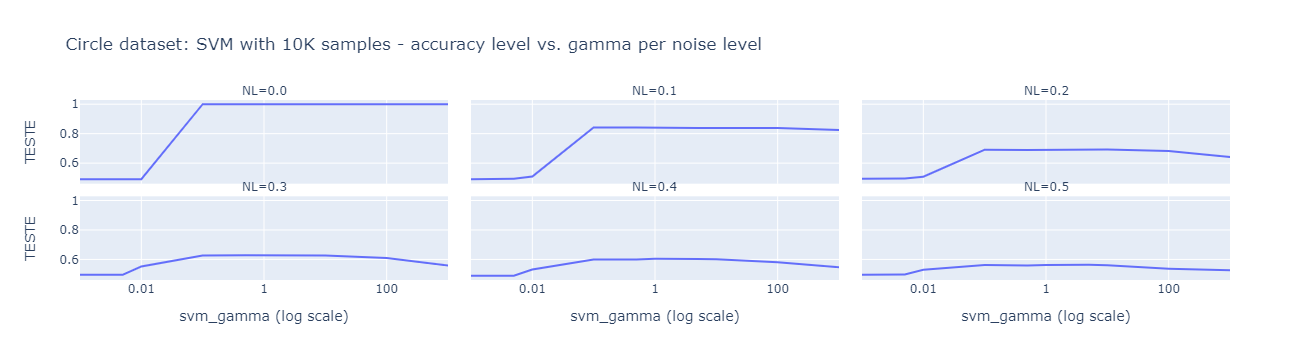

In [142]:
dfCircle = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'svm' & N == 10000")
dfBySvmAnd10K = circles_df.groupby(['NL', 'HPS']).apply(lambda group: group[group.TESTE == group.TESTE.max()]).reset_index(drop=True)
px.line(dfBySvmAnd10K, x='HPS', labels = {'HPS': 'svm_gamma (log scale)'}, y='TESTE', 
           facet_col='NL', facet_col_wrap=3,
           log_x=True, title="Circle dataset: SVM with 10K samples - accuracy level vs. gamma per noise level")

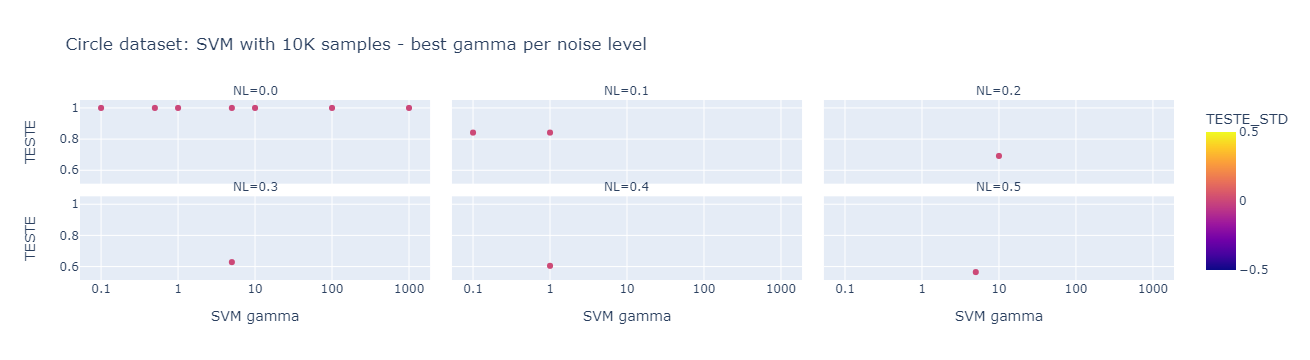

In [143]:
dfCircleOfBestGammaPerNLAnd10K = circles_df.groupby(['NL']).apply(lambda group: group[group.TESTE == group.TESTE.max()]).reset_index(drop=True)
px.scatter(dfCircleOfBestGammaPerNLAnd10K, x='HPS', labels = {'HPS': 'SVM gamma'}, y='TESTE', 
           log_x=True,
           color = 'TESTE_STD',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Circle dataset: SVM with 10K samples - best gamma per noise level")

For the Circle dataset, the best model parameter (gamma (HPS)) is different for each noise level:
- NL = 0: any value of gamma delivers the highest possible accuracy level (1)
- NL = 0.1: gamma=1, max acc(TESTE) is 0.8417
- NL = 0.2: gamma=10, max acc(TESTE) is 0.6919
- NL = 0.3: gamma=5, max acc(TESTE) is 0.6285
- NL = 0.4: gamma=1, max acc(TESTE) is 0.6047
- NL = 0.5: gamma=5, max acc(TESTE) is 0.5647
<br>The model is stable with standard deviation(TESTE_STD) <0.00671.


In [144]:
dfMoon = results_df.query("DS_NAME == 'Moon' & CLF_NAME == 'svm' & N == 10000")

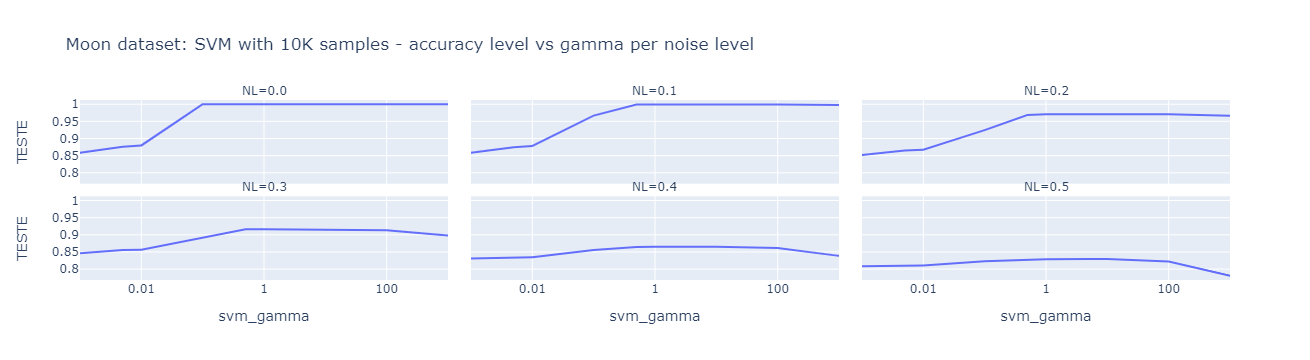

In [145]:
dfBySvmAnd10K = dfMoon.groupby(['NL', 'HPS']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
px.line(dfBySvmAnd10K, x='HPS', labels = {'HPS': 'svm_gamma'}, y='TESTE', 
           facet_col='NL', facet_col_wrap=3,
           log_x=True, title="Moon dataset: SVM with 10K samples - accuracy level vs gamma per noise level")

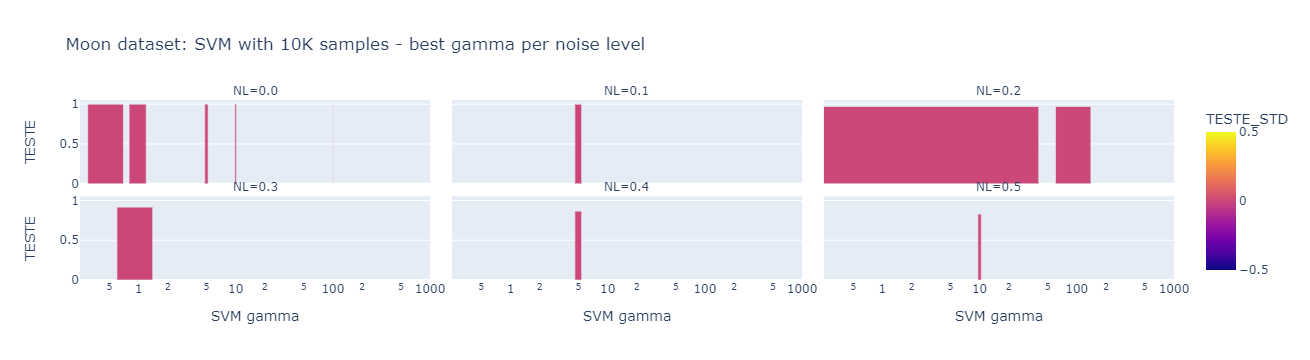

In [146]:
dfMoonOfBestGammaPerNLAnd10K = dfMoon.groupby(['NL']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
px.bar(dfMoonOfBestGammaPerNLAnd10K, x='HPS', labels = {'HPS': 'SVM gamma'}, y='TESTE', 
           log_x=True,
           color = 'TESTE_STD',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Moon dataset: SVM with 10K samples - best gamma per noise level")

For the Moon dataset, the best model parameter (gamma (HPS)) is different for each noise level:
- NL = 0: any value of gamma delivers the highest possible accuracy level (1)
- NL = 0.1: gamma=5, max acc(TESTE) is 0.0.9995
- NL = 0.2: gamma=1, max acc(TESTE) is 0.9707
- NL = 0.3: gamma=1, max acc(TESTE) is 0.9163
- NL = 0.4: gamma=5, max acc(TESTE) is 0.866
- NL = 0.5: gamma=10, max acc(TESTE) is 0.8293
<br>The model is stable with standard deviation(TESTE_STD) <0.00603.

### Q2

###  For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

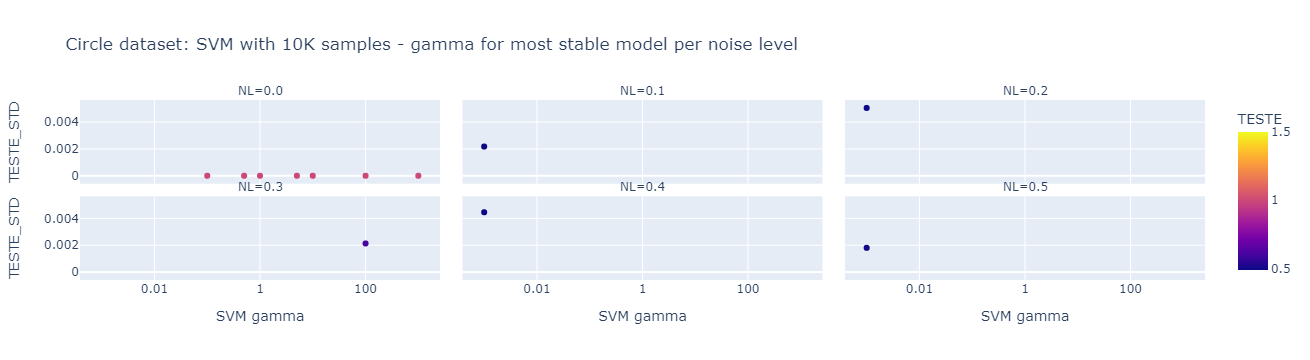

In [147]:
stableDataByGammaForCircleDb = dfCircle.groupby(['NL']).apply(lambda grp: grp[grp.TESTE_STD == grp.TESTE_STD.min()]).reset_index(drop=True)
px.scatter(stableDataByGammaForCircleDb, x='HPS', labels = {'HPS': 'SVM gamma'}, y='TESTE_STD', 
           log_x=True,
           color = 'TESTE',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Circle dataset: SVM with 10K samples - gamma for most stable model per noise level")

For the Circle dataset, the model parameter (gamma(HPS)) for most stable model is different for each noise level:
* NL = 0: any value of gamma between 0.001 and 1K delivers the highest stability level possible (0)
* NL = 0.1: gamma=0.001, min std (TESTE_STD) is 0.00217
* NL = 0.2: gamma=0.001, min std (TESTE_STD) is 0.00505
* NL = 0.3: gamma=100, min std (TESTE_STD) is 0.00213
* NL = 0.4: gamma=0.001, min std (TESTE_STD) is 0.00445
* NL = 0.5: gamma=0.001, min std (TESTE_STD) is 0.00180

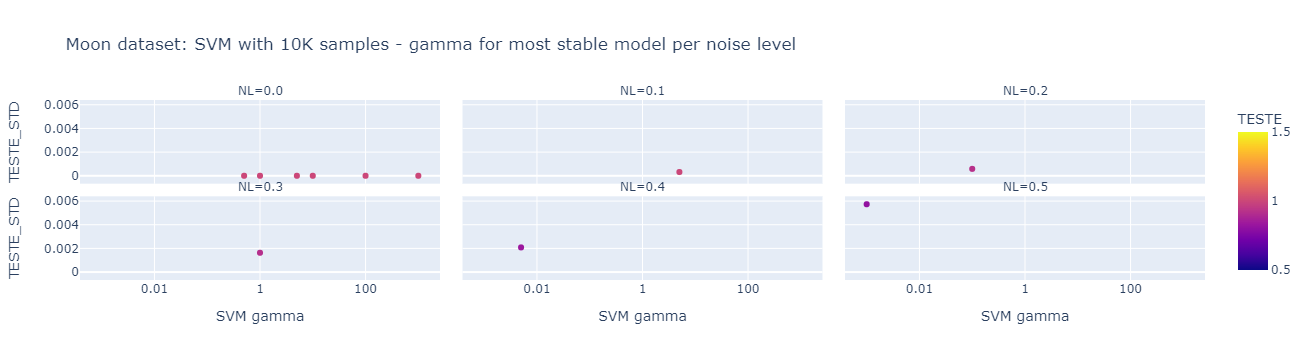

In [148]:
stableDataByGammaForMoonDb = dfMoon.groupby(['NL']).apply(lambda grp: grp[grp.TESTE_STD == grp.TESTE_STD.min()]).reset_index(drop=True)
px.scatter(stableDataByGammaForMoonDb, x='HPS', labels = {'HPS': 'SVM gamma'}, y='TESTE_STD', 
           log_x=True,
           color = 'TESTE',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Moon dataset: SVM with 10K samples - gamma for most stable model per noise level")

For the Moon dataset, the model parameter (gamma(HPS)) for most stable model is different for each noise level:
* NL = 0: any value of gamma between 0.001 and 1K delivers the highest stability level possible (0)
* NL = 0.1: gamma=5, min std (TESTE_STD) is 0.000316
* NL = 0.2: gamma=0.1, min std (TESTE_STD) is 0.000583
* NL = 0.3: gamma=1, min std (TESTE_STD) is 0.00163
* NL = 0.4: gamma=0.005, min std (TESTE_STD) is 0.00208
* NL = 0.5: gamma=0.001, min std (TESTE_STD) is 0.00573

In [149]:
dfOfLogRegInCircle = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 10000")
dfOfLogRegInMoon = results_df.query("DS_NAME == 'Moon' & CLF_NAME == 'logistic' & N == 10000")

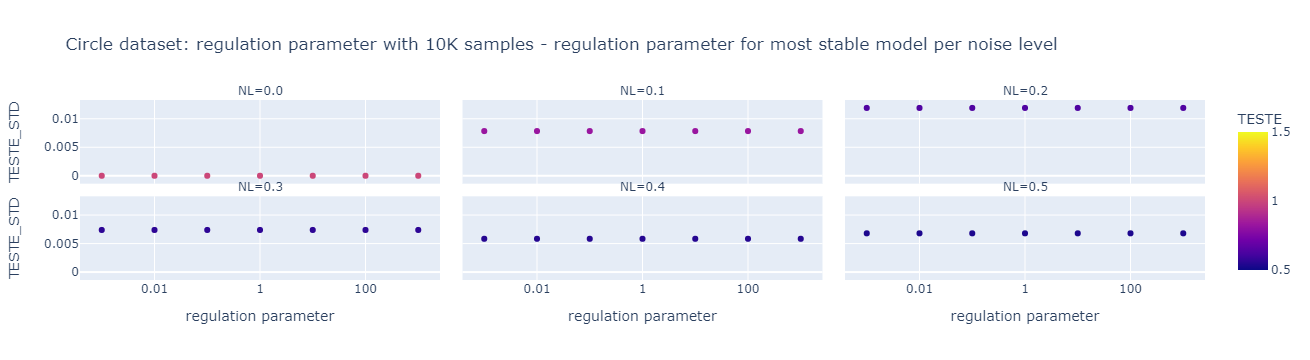

In [153]:
dfOfStableDataByLogRegPerNL = dfOfLogRegInCircle.groupby(['NL']).apply(lambda grp: grp[grp.TESTE_STD == grp.TESTE_STD.min()]).reset_index(drop=True)
px.scatter(dfOfStableDataByLogRegPerNL, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE_STD', 
           log_x=True,
           color = 'TESTE',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Circle dataset: regulation parameter with 10K samples - regulation parameter for most stable model per noise level")

The value of the regulation parameter does not affect the stability of the model in any of the noise levels:
- NL=0:   the TESTE_STD is 0 for no matter what the value of the regulation parameter is
- NL=0.1: the TESTE_STD is 0.00783 for no matter what the value of the regulation parameter is
- NL=0.2: the TESTE_STD is 0.0118 for no matter what the value of the regulation parameter is
- NL=0.3: the TESTE_STD is 0.00738 for no matter what the value of the regulation parameter is
- NL=0.4: the TESTE_STD is 0.00583 for no matter what the value of the regulation parameter is
- NL=0.5: the TESTE_STD is 0.00679 for no matter what the value of the regulation parameter is
<br>The accuracy level is below 0.826 which is bad.

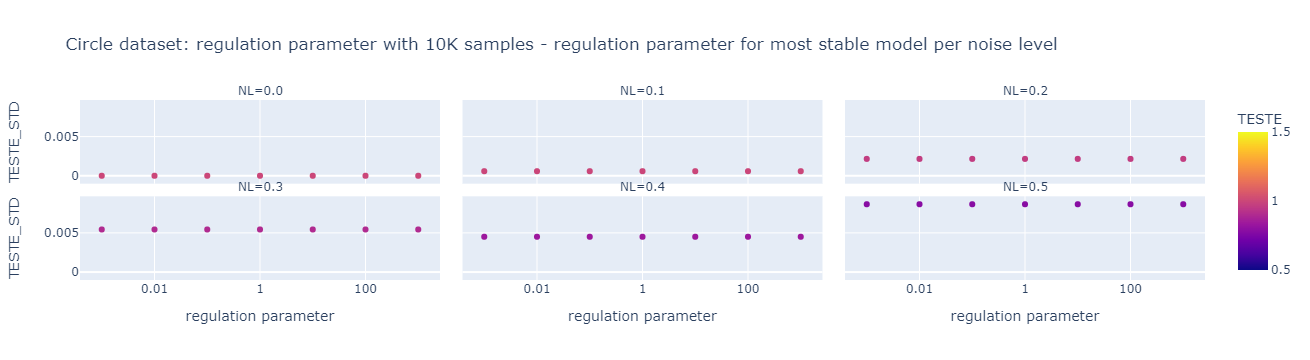

In [155]:
dfOfStableDataByLogRegPerNL = dfOfLogRegInMoon.groupby(['NL']).apply(lambda grp: grp[grp.TESTE_STD == grp.TESTE_STD.min()]).reset_index(drop=True)
px.scatter(dfOfStableDataByLogRegPerNL, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE_STD', 
           log_x=True,
           color = 'TESTE',
           facet_col = 'NL', facet_col_wrap = 3,
           title="Circle dataset: regulation parameter with 10K samples - regulation parameter for most stable model per noise level")

The value of the regulation parameter does not affect the stability of the model in any of the noise levels:
- NL=0:   the TESTE_STD is 0 for no matter what the value of the regulation parameter is
- NL=0.1: the TESTE_STD is 0.00583 for no matter what the value of the regulation parameter is
- NL=0.2: the TESTE_STD is 0.00215 for no matter what the value of the regulation parameter is
- NL=0.3: the TESTE_STD is 0.00543 for no matter what the value of the regulation parameter is
- NL=0.4: the TESTE_STD is 0.00450 for no matter what the value of the regulation parameter is
- NL=0.5: the TESTE_STD is 0.00865 for no matter what the value of the regulation parameter is
<br> The accuracy level is between 0.78 and 1 which is not that bad.

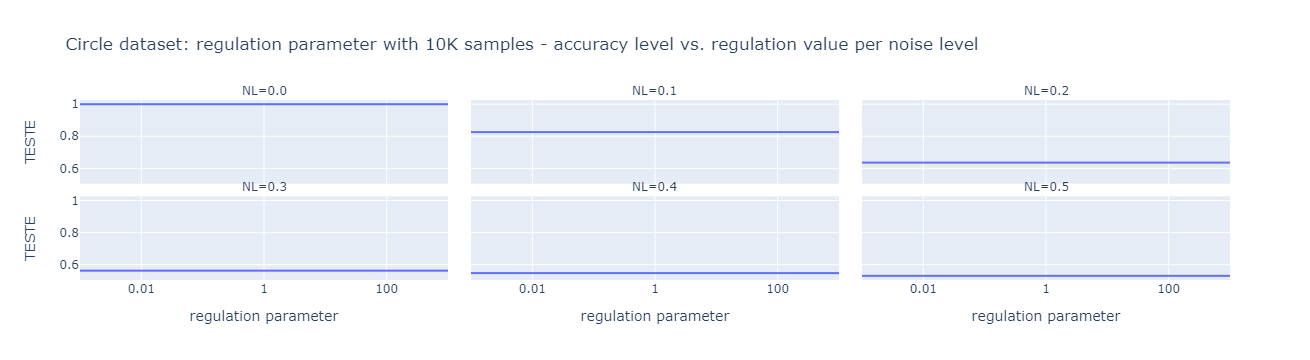

In [158]:
dfOfLogRegIn10KSampels = dfOfLogRegInCircle.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
px.line(dfOfLogRegIn10KSampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circle dataset: regulation parameter with 10K samples - accuracy level vs. regulation value per noise level")

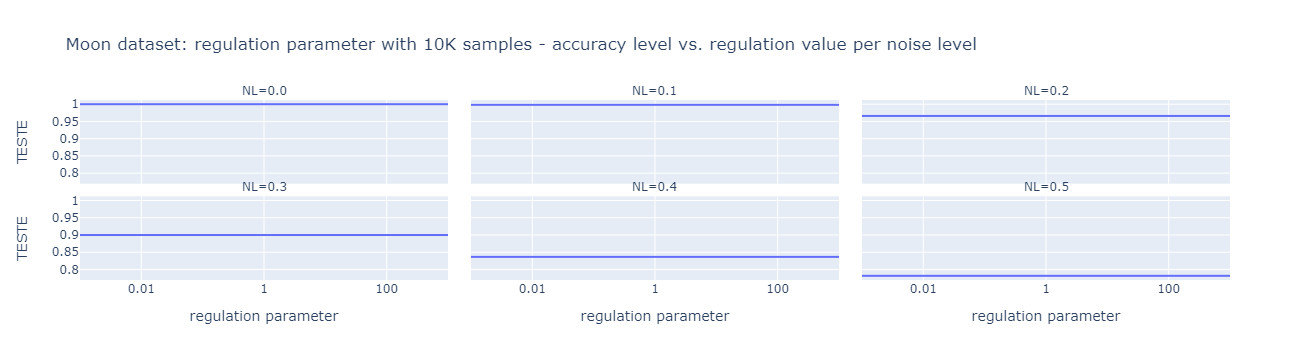

In [159]:
dfOfLogRegIn10KSampels = dfOfLogRegInMoon.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
px.line(dfOfLogRegIn10KSampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Moon dataset: regulation parameter with 10K samples - accuracy level vs. regulation value per noise level")

### Q3

### Does regularization help for linear models? consider different datasets sizes

In [160]:
dfOfCircleDbIn10SamplesAndLogReg = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 10")
dfOfCircleDbIn50SamplesAndLogReg = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 50")
dfOfCircleDbIn100SamplesAndLogReg = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 100")
dfOfCircleDbIn1000SamplesAndLogReg = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 1000")
dfOfCircleDbIn10000SamplesAndLogReg = results_df.query("DS_NAME == 'Circle' & CLF_NAME == 'logistic' & N == 10000")

In [161]:
dfOfLogRegIn10Sampels = dfOfCircleDbIn10SamplesAndLogReg.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
dfOfLogRegIn50Sampels = dfOfCircleDbIn50SamplesAndLogReg.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
dfOfLogRegIn100Sampels = dfOfCircleDbIn100SamplesAndLogReg.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
dfOfLogRegIn1000Sampels = dfOfCircleDbIn1000SamplesAndLogReg.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)
dfOfLogRegIn10000Sampels = dfOfCircleDbIn10000SamplesAndLogReg.groupby(['NL', 'REGULARIZATIN']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)

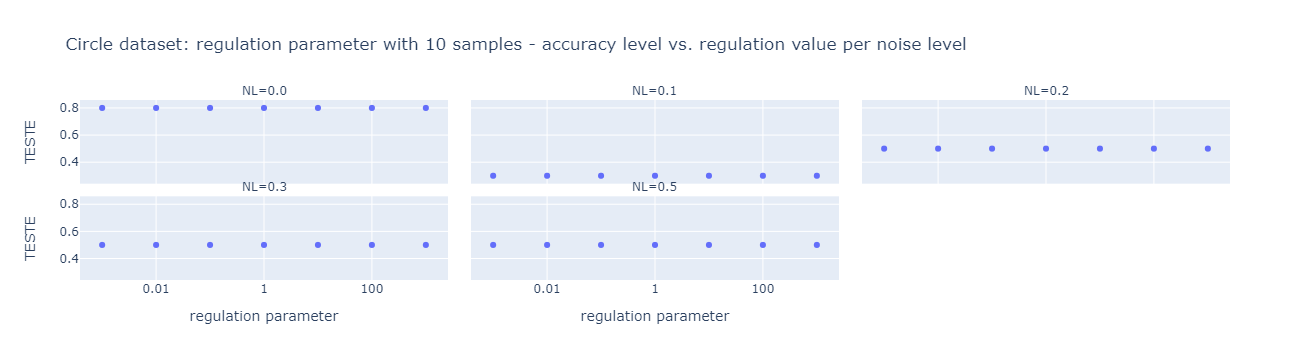

In [162]:
px.scatter(dfOfLogRegIn10Sampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circle dataset: regulation parameter with 10 samples - accuracy level vs. regulation value per noise level")

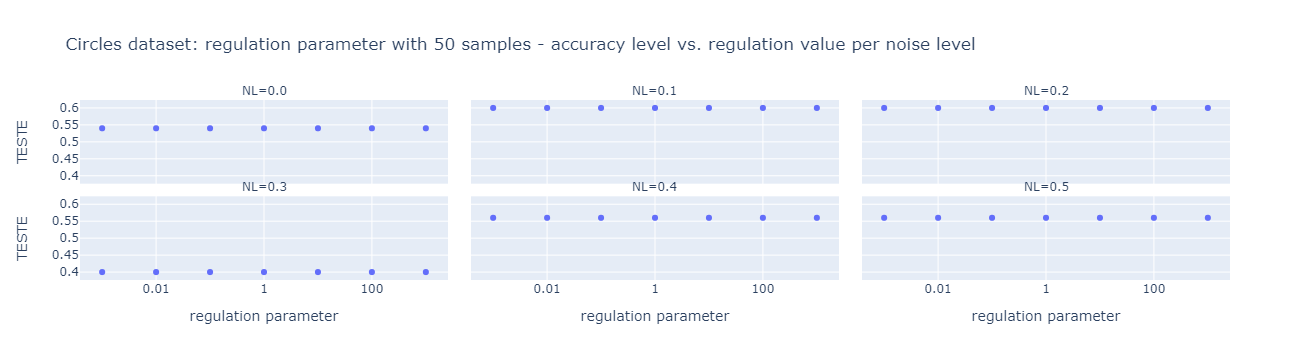

In [163]:
px.scatter(dfOfLogRegIn50Sampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circles dataset: regulation parameter with 50 samples - accuracy level vs. regulation value per noise level")

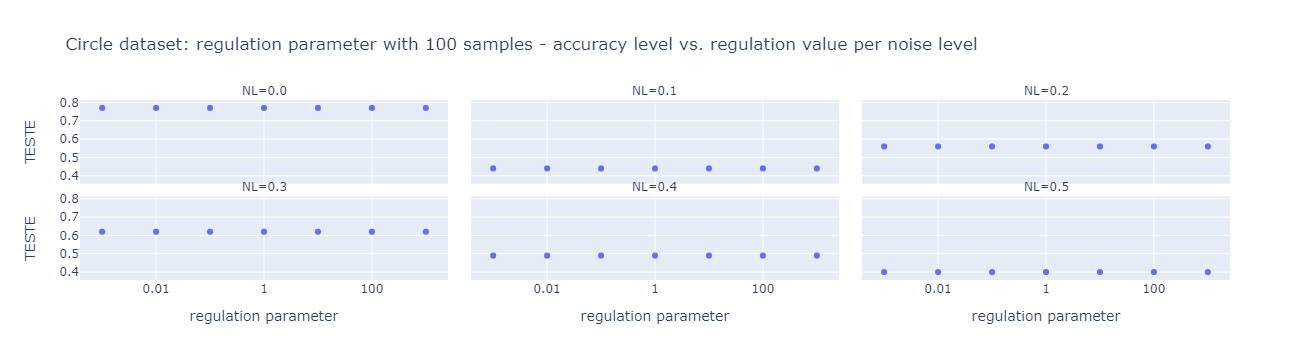

In [164]:
px.scatter(dfOfLogRegIn100Sampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circle dataset: regulation parameter with 100 samples - accuracy level vs. regulation value per noise level")

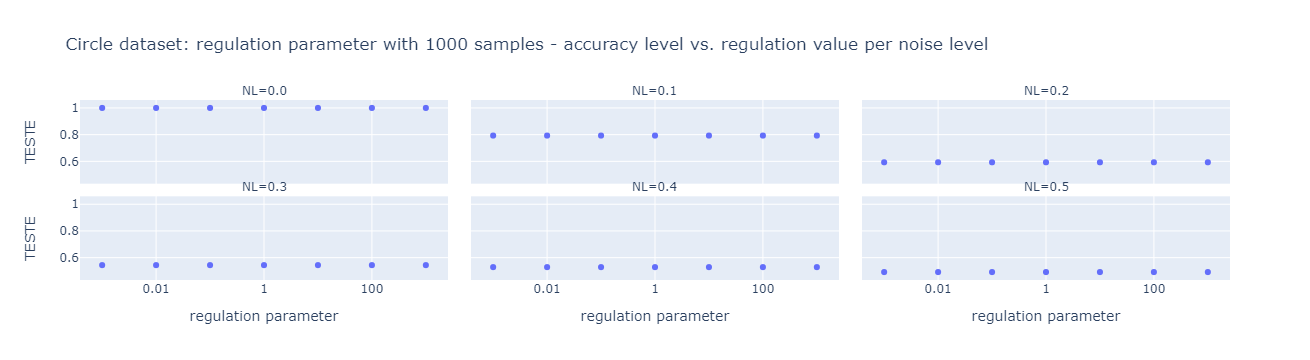

In [165]:
px.scatter(dfOfLogRegIn1000Sampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circle dataset: regulation parameter with 1000 samples - accuracy level vs. regulation value per noise level")

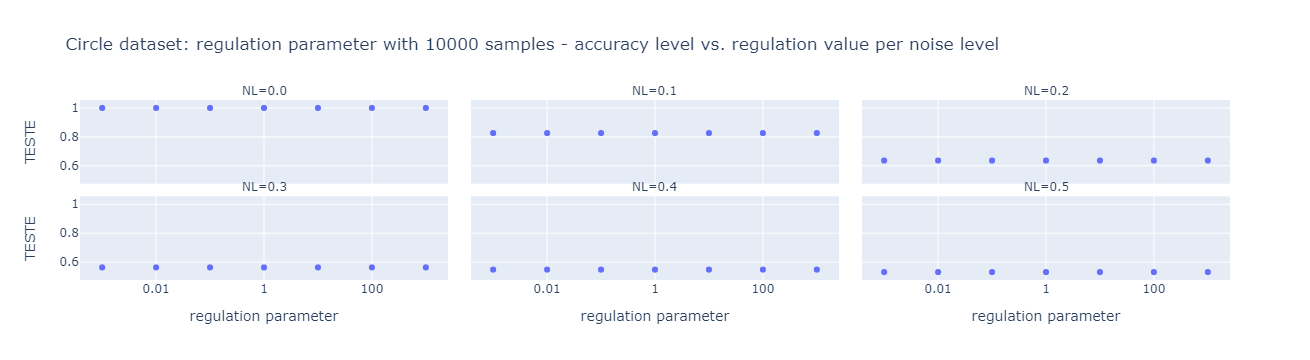

In [166]:
px.scatter(dfOfLogRegIn10000Sampels, x='REGULARIZATIN', labels = {'REGULARIZATIN': 'regulation parameter'}, y='TESTE', 
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Circle dataset: regulation parameter with 10000 samples - accuracy level vs. regulation value per noise level")

The regulation does not help the linear model.
<br>becuase we see that the accuracy still the same per noise level ,so no matter what the regulation value is.
<br>This is true for both Circle and Moon datasets.

### Q4

###  For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

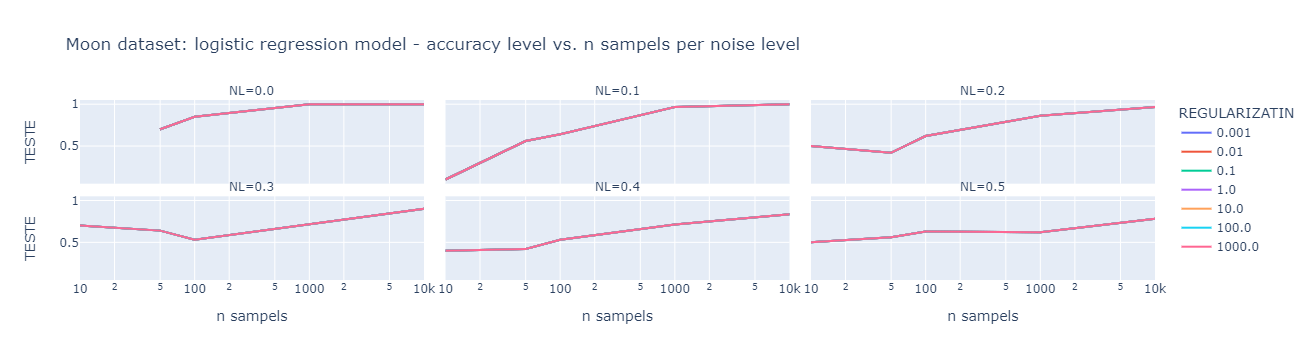

In [170]:
dfMoonWithLogReg = results_df.query("DS_NAME == 'Moon' & CLF_NAME == 'logistic'")
px.line(dfMoonWithLogReg, x='N', labels = {'N': 'n sampels'}, y='TESTE', 
        color = 'REGULARIZATIN',
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Moon dataset: logistic regression model - accuracy level vs. n sampels per noise level")

Choosing NL = 0.3, the accuracy level of the logistic regression initially goes down with data size, than the data size increase and the accuracy get better and bogger too.

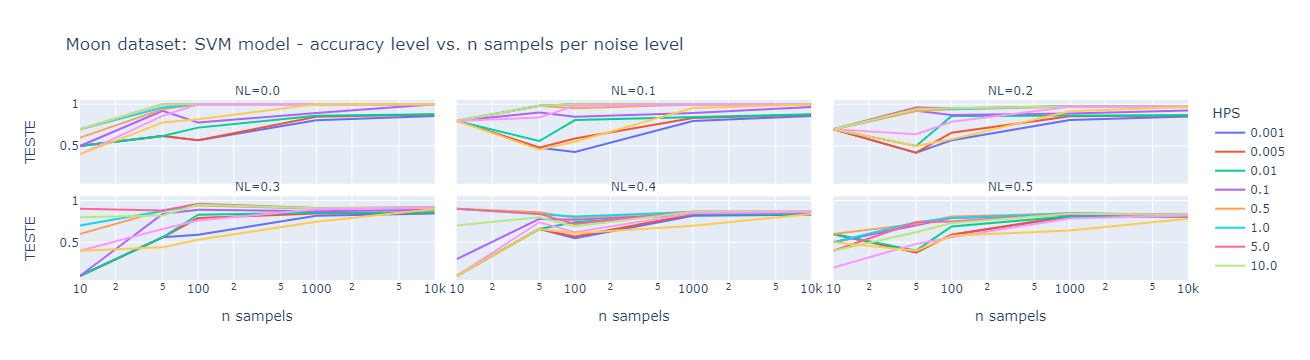

In [172]:
dfMoonWithSvm = results_df.query("DS_NAME == 'Moon' & CLF_NAME == 'svm'")
px.line(dfMoonWithSvm, x='N', labels = {'N': 'n sampels'}, y='TESTE', 
        color = 'HPS',
        facet_col='NL', facet_col_wrap=3,
        log_x=True, 
        title="Moon dataset: SVM model - accuracy level vs. n sampels per noise level")

For the SVM model, the value of the hyper parameter gamma strongly affects the accuracy with noise levels.
<br> so we can see that accuracy increasing when the noise level low with data size under low noise.
<br> and the accuracy decreasing when noise levels are very high e.g. 0.4 and 0.5.

### Q5

### For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)

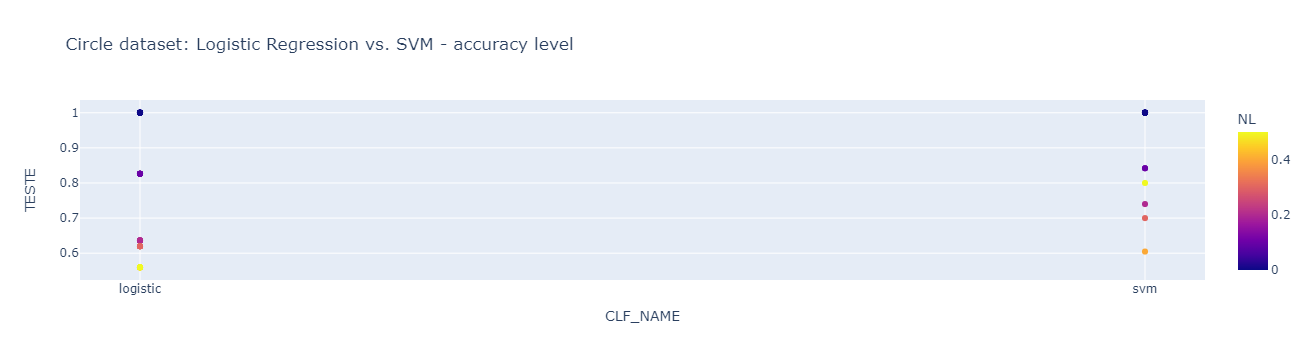

In [182]:
dfCircleAndNL = circles_nl_df.groupby(['NL', 'CLF_NAME']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)

px.scatter(dfCircleAndNL, x='CLF_NAME', y='TESTE', 
        color = 'NL',
        title="Circle dataset: Logistic Regression vs. SVM - accuracy level")

From the plot above, we can see that for any noise level we choose, the more complex model like SVM model get higher accuracy level than Logistic Regression.

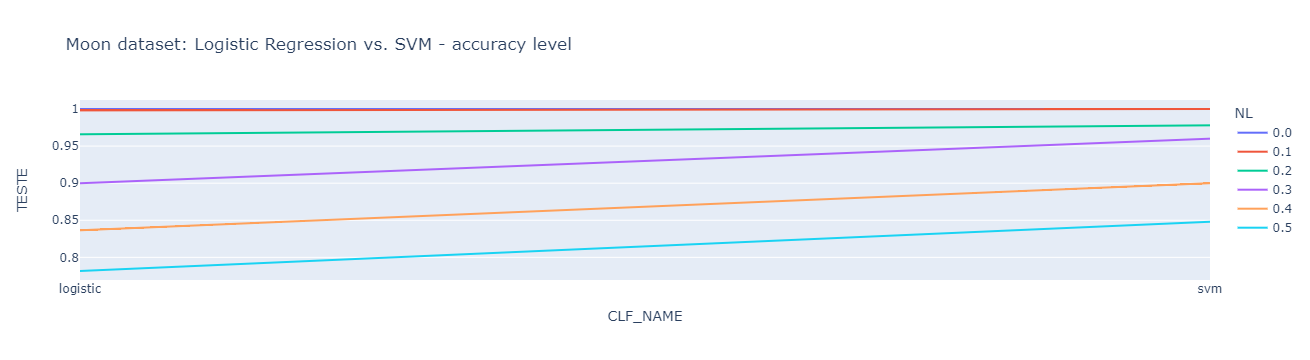

In [178]:
dfMoonAndNL = moons_nl_df.groupby(['NL', 'CLF_NAME']).apply(lambda grp: grp[grp.TESTE == grp.TESTE.max()]).reset_index(drop=True)

px.line(dfMoonAndNL, x='CLF_NAME', y='TESTE',
        color = 'NL',
        title="Moon dataset: Logistic Regression vs. SVM - accuracy level")

From the plot above, we can see that also for the Moon dataset, for any noise level we choose, the more complex model SVM model get higher accuracy level than Logistic Regression.

#### Q6

### Are the noise level effect the number of datapoints needed to reach optimal test results?

### SVM model:
<b style="color:red">Yes</b>, The noise level does affect the number of datapoints required to reach optimal test results. <br>With low noise levels (0 and 0.1) the greater the number of datapoints, the accuracy can be high. <br>With noise levels (0.2-0.5), and more datapoints actually degrade the performance of the models.
<br><br>

### Logistic Regression model:
<b style="color:red">Yes</b>, 
like SVM model, the noise level does affect the number of datapoints required to reach optimal test results.
<br>With low noise level big number of datapoints or less with the accuracy can be high, and for high noise level and big number of datapoints can degrade the performance. 

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [17]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:




Your 

You experiment code should look something like that:

In [18]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = <'Your hyper parameters ranges here'>
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

SyntaxError: invalid syntax (3386946450.py, line 6)

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [30]:
slope, intercept = 2.5, 6

In [31]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [32]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

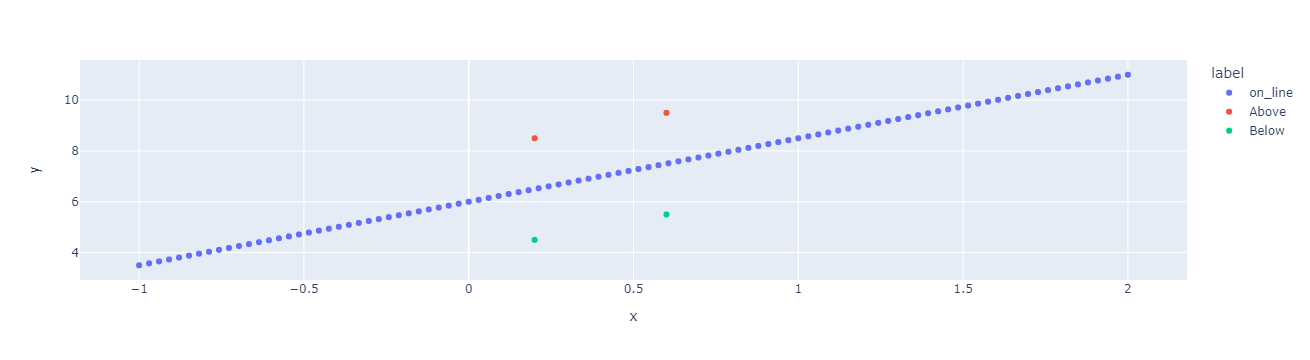

In [33]:
px.scatter(data, x='x', y='y', color = 'label')